1. Raman spectroscopy is a technique that uses inelastic scattering of light to identify unknown chemical substances. Spectral “peaks” indicate vibrational and rotational modes and are of special importance because they act like a chemical fingerprint. Raman spectroscopy measures photon intensity vs. Raman shift. The Raman shift relates the frequencies of the exciting laser and the scattered photons and is often reported as a wavenumber — the frequency difference in wavelengths per cm (i.e., ,cm−1).
• Generate a molecular fingerprint using the spectroscopic data in raman.rod. The file contains intensity vs. wavenumber data for an unknown chemical sample. A Raman Open Database (ROD) file includes content in addition to the raw intensity data:
content
more content
_raman_spectrum.intensity
wavenumber1 intensity1
wavenumber2 intensity2
...
wavenumbern intensityn

Use string matching to ignore all lines before raman spectrum.intensity. Load valid (wavenumber, intensity) pairs until the first invalid intensity line (or upon reaching the end of file). Use the method below to estimate the wavenumbers of all spectral peaks. You may use any standard NumPy or SciPy packages or experiment with your own algorithms.
• First detect peaks in the raw spectral data. Use the peak locations to focus on regions of interest apart from the complete dataset. For instance: if you detect peaks at x1 cm−1 and x2 cm−1 use regions of interest: [x1 − n1, x1 + n1] and [x2 − n2, x2 + n2]. Experiment to find “good” widths n1, n2, etc. Then use a spline to interpolate intensity within each region of interest.
Calculate zero-crossings of the derivative to estimate wavenumbers with maximum intensity.
(a) Print the wavenumber estimates for the eight largest spectral peak to STDOUT sorted by magnitude (largest first).
(b) Create a figure that shows the Raman data (intensity vs. wavenumber) and mark each of the maximum intensity values.
(c) Produce a “zoomed-in” figure for the “regions of interest” corresponding to the four largest peaks. Plot the raw spectral data and overlay your interpolating function. Use a marker to show the wavenumber with maximal intensity.

In [2]:
# Importing the required libraries. 
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline, CubicSpline
from cProfile import label

# Mounting the dataset from Google drive.
from google.colab import drive
drive.mount('/content/drive')

wavenumber, intensity = np.loadtxt("raman.txt", unpack = True) # Loading the dataset.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Printing the wavenumber estimates for the eight largest spectral peak to STDOUT sorted by magnitude (largest first).

In [3]:
peaks, _ = find_peaks(intensity, height = 2200) # All the peak values lie above the 2200th mark.
peak_values = [(wavenumber[peak], intensity[peak], peak) for peak in peaks]
peak_values.sort(key = lambda x: x[1], reverse = True) # Sorting the list in descending order.
print("Top values:")

for ele in range(8):
        print(peak_values[ele], file = sys.stdout)
print(" Wavenumber Intensity  Index") # Printing the eight largest spectral peak.

Top values:
(750.42657, 15275.059, 636)
(1250.886, 5203.3115, 1907)
(2975.9155, 4767.228, 6288)
(2974.7341, 4756.6265, 6285)
(2977.0967, 4666.8809, 6291)
(2977.8843, 4603.4209, 6293)
(2947.959, 4266.6968, 6217)
(2948.7466, 4247.2852, 6219)
 Wavenumber Intensity  Index


Visualizing the Raman data (intensity versus wavenumber) with the maximum intensity values marked on the graph.

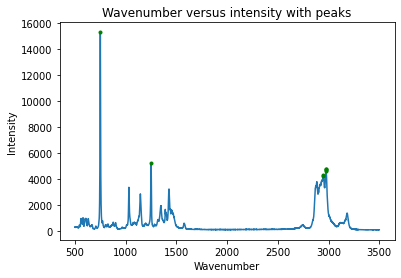

In [4]:
peak_index = []
for iter in range(8): 
    peak_index.append(peak_values[iter][2]) 

#Plotting the graph.    
plt.title("Wavenumber versus intensity with peaks")
plt.xlabel("Wavenumber")
plt.ylabel("Intensity")
plt.plot(wavenumber, intensity)
plt.plot(wavenumber[peak_index], intensity[peak_index], ".", color = "green")

In [5]:
def spline(peak, w0):
  # Region of interest is the curve which is located near the peak.
  roi_wavenumber = []  
  roi_intensity = []
    
  for j in range(len(wavenumber)):
      if wavenumber[j] >= wavenumber[peak - w0] and wavenumber[j] <= wavenumber[peak + w0]: # Defining the window size around the peak.
          # Appending the peak values.
          roi_wavenumber.append(wavenumber[j])
          roi_intensity.append(intensity[j])

  intra = CubicSpline(roi_wavenumber, roi_intensity) # Intrapolating the graph in the vicinity of a peak.
  dydx = intra.derivative() # Derivative of a peak (maxima) = 0.
  rn = dydx.roots() # Finding the roots of the derivative.
  max_values = np.amax(intra(rn)) # Returns the maximum value in a particular row. 
  maxroot_index = rn[np.argmax(intra(rn))] # Returns the index position of the maximum value.

  # Plotting the zoomed-in graphs displaying the regions of interest.  
  plt.title("Zoomed-in regions of interest containing the peaks")
  plt.xlabel("Wavenumber")
  plt.ylabel("Intensity")
  plt.plot(roi_wavenumber, roi_intensity, "b.", label = "Actual data")
  plt.plot(roi_wavenumber, intra(roi_wavenumber), color = "black",  label = "Cubic Spline")
  plt.plot(maxroot_index, max_values, "r*", markersize = 10, label = "Peak")
  plt.legend()
  plt.show()
  return maxroot_index, max_values

def check(lowl, upl):
  diff = upl - lowl # Range of the window.
  p = upl - diff//2 # "Zooming-in" on a particular region of the graph.
  N = diff//2 # Middle value of the window.
  maxroot_index, max_values = spline(p, N)    
  return maxroot_index, max_values

Visualizing the “zoomed-in” graphs for four regions of interest.

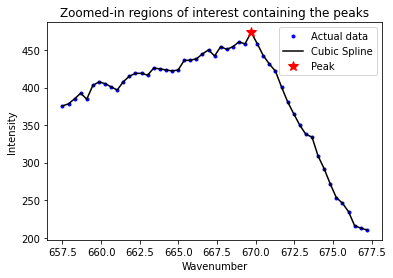

The corresponding wavenumber and intensity values-

 Wavenumber: 669.7287209459599 | Intensity: 473.58975118356864


In [6]:
# Test case- 1
lowl = 400
upl = 450
if lowl > upl:
  print("Lower index can not be greater than the upper limit")
  quit
else:
  maxroot_index, max_values = check(lowl, upl)
  print("The corresponding wavenumber and intensity values-")
  print("\n Wavenumber:", maxroot_index, "|", "Intensity:", max_values)

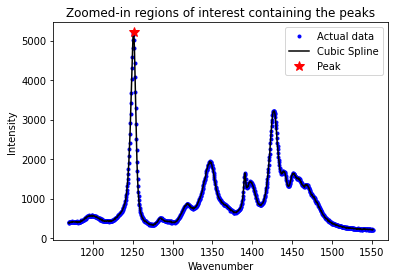

The corresponding wavenumber and intensity values-

 Wavenumber: 1251.0611394869711 | Intensity: 5212.253736409194


In [7]:
# Test case- 2
lowl = 1700
upl = 2670
if lowl > upl:
  print("Lower index can not be greater than the upper limit")
  quit
else:
  maxroot_index, max_values = check(lowl, upl)
  print("The corresponding wavenumber and intensity values-")
  print("\n Wavenumber:", maxroot_index, "|", "Intensity:", max_values)

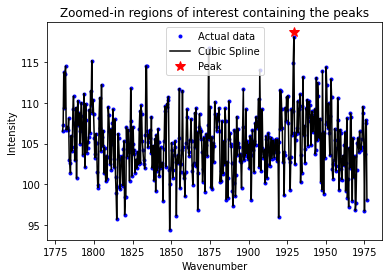

The corresponding wavenumber and intensity values-

 Wavenumber: 1929.2311926076097 | Intensity: 118.68470008307105


In [8]:
# Test case- 3
lowl = 3250
upl = 3750
if lowl > upl:
  print("Lower index can not be greater than the upper limit")
  quit
else:
  maxroot_index, max_values = check(lowl, upl)
  print("The corresponding wavenumber and intensity values-")
  print("\n Wavenumber:", maxroot_index, "|", "Intensity:", max_values)

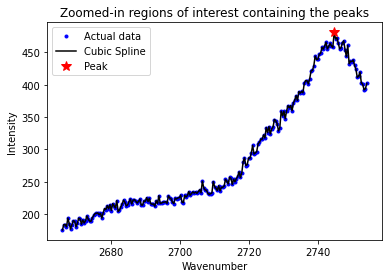

The corresponding wavenumber and intensity values-

 Wavenumber: 2744.829934668138 | Intensity: 480.9234644681971


In [9]:
# Test case- 4
lowl = 5500
upl = 5725
if lowl > upl:
  print("Lower index can not be greater than the upper limit")
  quit
else:
  maxroot_index, max_values = check(lowl, upl)
  print("The corresponding wavenumber and intensity values-")
  print("\n Wavenumber:", maxroot_index, "|", "Intensity:", max_values)

In [10]:
# Test case- 5
lowl = 6000
upl = 5143
if lowl > upl:
  print("Lower index can not be greater than the upper limit")
  quit
else:
  maxroot_index, max_values = check(lowl, upl)
  print("The corresponding wavenumber and intensity values-")
  print("\n Wavenumber:", maxroot_index, "|", "Intensity:", max_values)

Lower index can not be greater than the upper limit
